<a href="https://colab.research.google.com/github/Lakshmi-Priya-Y/FMML_projects_labs_2024/blob/main/AIML_III_Module_01_Lab_01_Featuresipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install wikipedia
import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=4ac23549f674f4392e43dfe4f01011b91d92b1f9e42560e83568fb402bd77ac3
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


#Part1 : Features of Text

In [81]:
topic1 = 'Airlines'
topic2 = 'continental Airlines'
wikipedia.set_lang('en') #english
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('es') #spanish
es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

In [82]:
#cleaning the text
def clean(text):
  text = text.lower()
  text = re.sub('[^a-z]+','',text)
  return text

In [65]:
eng1 = clean(eng1)
eng2 = clean(eng2)
es1 = clean(es1)
es2 = clean(es2)

In [66]:
print(eng1)

anairlineisacompanythatprovidesairtransportservicesfortravelingpassengersandorfreightairlinesuseaircrafttosupplytheseservicesandmayformpartnershipsorallianceswithotherairlinesforcodeshareagreementsinwhichtheybothofferandoperatethesameflightgenerallyairlinecompaniesarerecognizedwithanairoperatingcertificateorlicenseissuedbyagovernmentalaviationbodyairlinesmaybescheduledorcharteroperatorsthefirstairlinewasthegermanairshipcompanydelagfoundedonnovemberthefouroldestnonairshipairlinesthatstillexistarethenetherlandsklmcolombiasaviancaaustraliasqantasandtherussianaeroflotairlineownershiphasseenashiftfrommostlypersonalownershipuntilthestogovernmentownershipofmajorairlinesfromthestosandbacktolargescaleprivatizationfollowingthemidssincethestherehasbeenatrendofmajorairlinemergersandtheformationofairlinealliancesthelargestalliancesarestarallianceskyteamandoneworldairlinealliancescoordinatetheirpassengerserviceprogramssuchasloungesandfrequentflyerprogramsofferspecialinterlineticketsandoftenengageine

In [70]:
#converting a tuple of characters to a string
def tup_to_string(tup):
  string = ''
  for i in tup:
    string = string+i
  return string


In [71]:
#converting tuple of tuples into list of strings
def key_to_string(keys):
  return [tup_to_string(i) for i in keys]


In [72]:
#plotting histogram
def histo(ngram):
  keys = key_to_string(ngram.keys())
  values = list(ngram.values())
  #sorting the keys in alphabetical order
  combined = zip(keys,values)
  zip_sorted = sorted(combined,key=lambda x: x[0])
  keys,values = map(list,zip(*zip_sorted))
  plt.bar(keys,values)

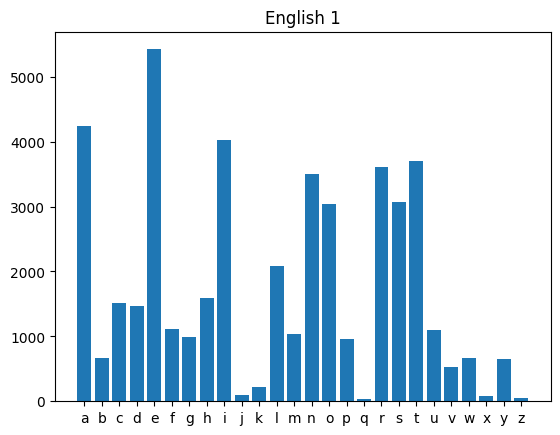

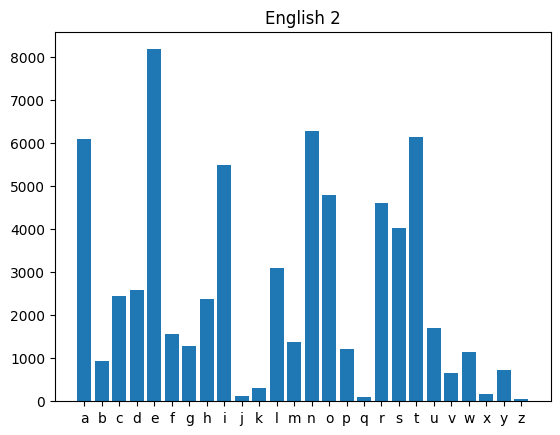

In [73]:
unigram_eng1 = Counter(ngrams(eng1,1))
histo(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
histo(unigram_eng2)
plt.title('English 2')
plt.show()

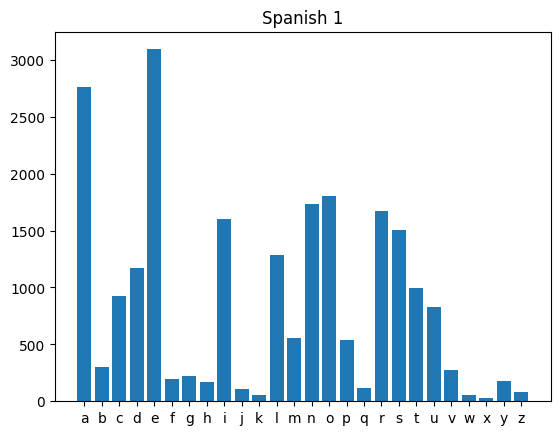

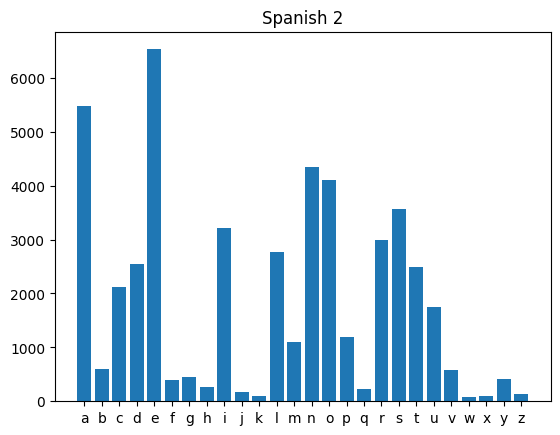

In [74]:
unigram_es1 = Counter(ngrams(es1,1))
histo(unigram_es1)
plt.title('Spanish 1')
plt.show()
unigram_es2 = Counter(ngrams(es2,1))
histo(unigram_es2)
plt.title('Spanish 2')
plt.show()

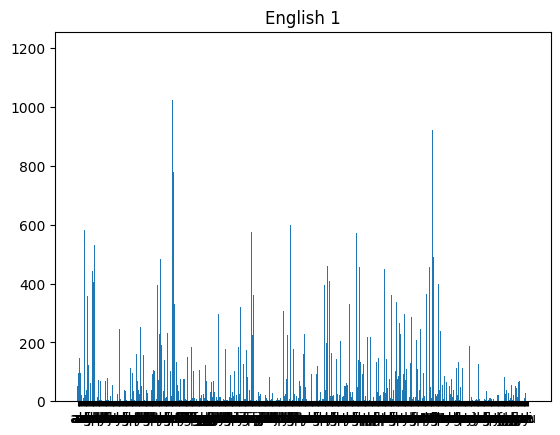

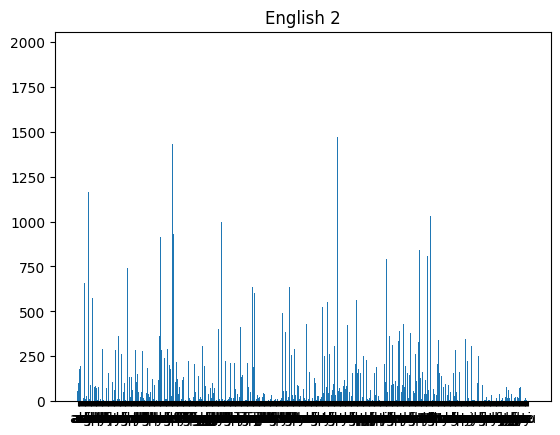

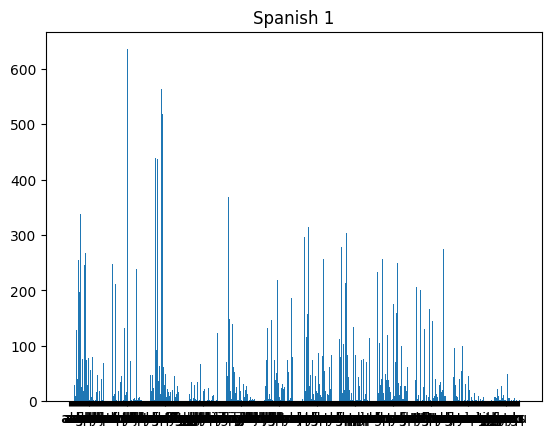

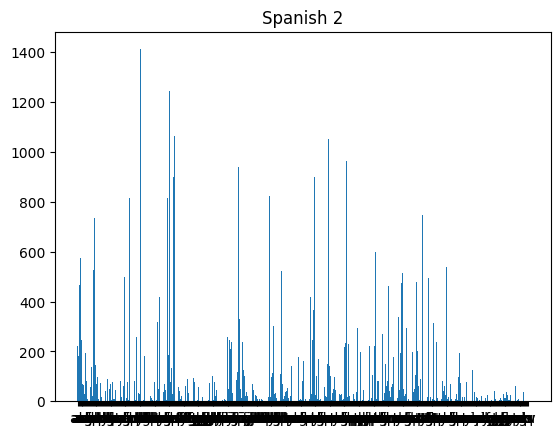

In [75]:
#bigrams
bigram_eng1 = Counter(ngrams(eng1,2))
histo(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
histo(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_es1 = Counter(ngrams(es1,2))
histo(bigram_es1)
plt.title('Spanish 1')
plt.show()

bigram_es2 = Counter(ngrams(es2,2))
histo(bigram_es2)
plt.title('Spanish 2')
plt.show()

In [76]:
#Visualizing bigrams using a 2-dimensional graph
def histogram(ngram):
  fre = np.zeros((26,26))
  for i in range(26):
    for j in range(26):
      fre[i,j] = ngram[(chr(ord('a')+i),chr(ord('a')+j))]
  plt.imshow(fre,cmap = 'jet')
  return fre

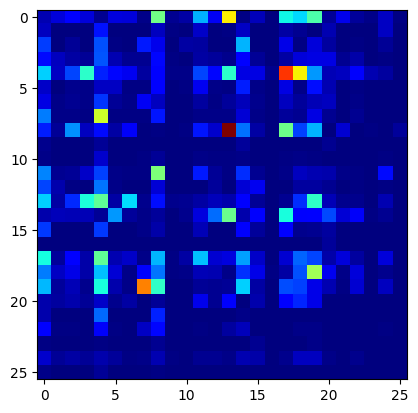

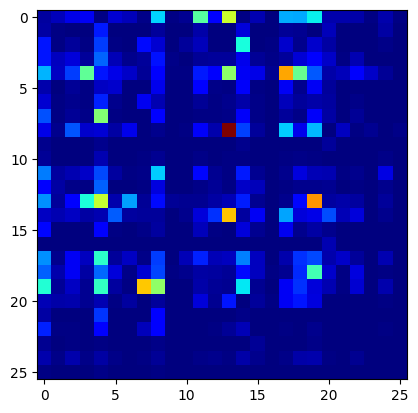

In [77]:
bieng1 = histogram(bigram_eng1)
plt.show()
bieng2 = histogram(bigram_eng2)

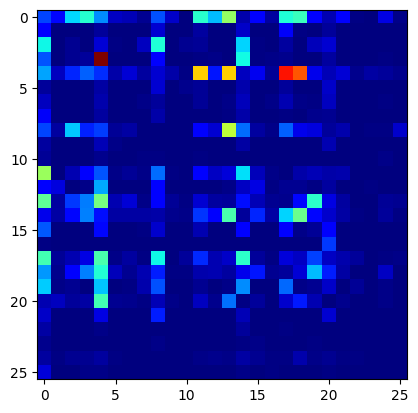

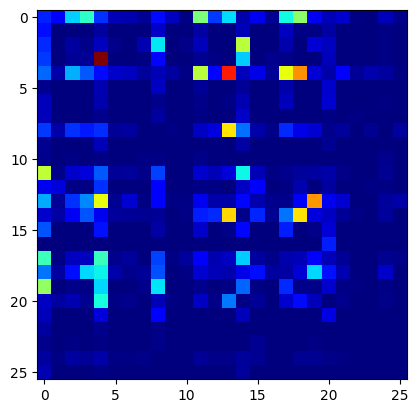

In [78]:
bies1 = histogram(bigram_es1)
plt.show()
bies2 = histogram(bigram_es2)

Top 10 ngrams for each text

In [79]:
from IPython.core.debugger import set_trace
def ind2tup(index):
  index = int(index)
  i = int(index/26)
  j  = int(index%26)
  return (chr(ord('a')+i),chr(ord('a')+j))

def ShowtopN(bifreq,n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for i in range(n):
    print(f'{ind2tup(arg[i])} : {f[arg[i]]}')

In [80]:
print('\nEnglish 1: ')
ShowtopN(bieng1)
print('\nEnglish 2: ')
ShowtopN(bieng2)
print('\nSpanish 1: ')
ShowtopN(bies1)
print('\nSpanish 2: ')
ShowtopN(bies2)


English 1: 
('i', 'n') : 1196.0
('e', 'r') : 1022.0
('t', 'h') : 921.0
('a', 'n') : 787.0
('e', 's') : 778.0
('h', 'e') : 718.0
('s', 't') : 651.0
('l', 'i') : 598.0
('a', 'i') : 583.0
('i', 'r') : 576.0

English 2: 
('i', 'n') : 1958.0
('n', 't') : 1469.0
('e', 'r') : 1431.0
('o', 'n') : 1372.0
('t', 'h') : 1363.0
('a', 'n') : 1165.0
('n', 'e') : 1153.0
('t', 'i') : 1028.0
('e', 'n') : 1022.0
('h', 'e') : 996.0

Spanish 1: 
('d', 'e') : 635.0
('e', 'r') : 564.0
('e', 's') : 519.0
('e', 'l') : 439.0
('e', 'n') : 437.0
('i', 'n') : 369.0
('l', 'a') : 342.0
('a', 'n') : 337.0
('n', 'e') : 314.0
('o', 's') : 303.0

Spanish 2: 
('d', 'e') : 1412.0
('e', 'n') : 1243.0
('e', 's') : 1066.0
('n', 't') : 1054.0
('o', 'n') : 964.0
('o', 's') : 947.0
('i', 'n') : 940.0
('n', 'e') : 899.0
('e', 'r') : 899.0
('l', 'a') : 825.0


# Part 2: Written Numbers

In [24]:
#Loading the dataset
from keras.datasets import mnist
(train_x, train_y), (test_x,test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extracting a subset of data

In [25]:
no1 = train_x[train_y==1,:,:]
no0 = train_x[train_y==0,:,:]

Visualising images

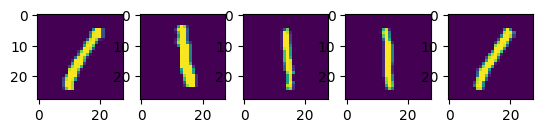

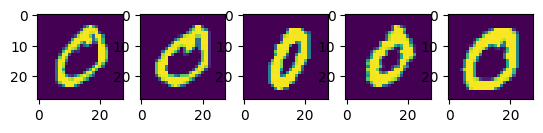

In [26]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(no1[i,:,:])
plt.show()
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(no0[i,:,:])
plt.show()

Sum of all pixels

In [49]:
sum1 = np.sum(no1>0, (1,2))
sum0 = np.sum(no0>0,(1,2))

(array([  49.,  339., 1102., 1679., 1630.,  778.,  274.,   62.,    8.,
           2.]),
 array([ 90. , 116.1, 142.2, 168.3, 194.4, 220.5, 246.6, 272.7, 298.8,
        324.9, 351. ]),
 <BarContainer object of 10 artists>)

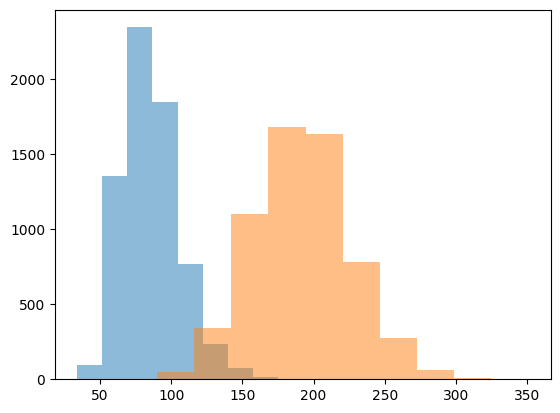

In [50]:
plt.hist(sum1,alpha = 0.5)
plt.hist(sum0,alpha = 0.5)

In [29]:
def cumArray(img):
  img2 = img.copy()
  for i in range(1,img2.shape[1]):
    img2[i,:] = img2[i,:] + img2[i-1,:]
  img2 =img2>0
  return img2
def holePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole

Visualizing

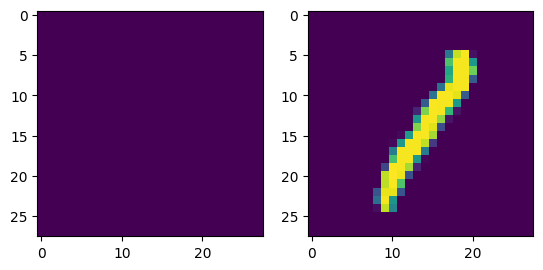

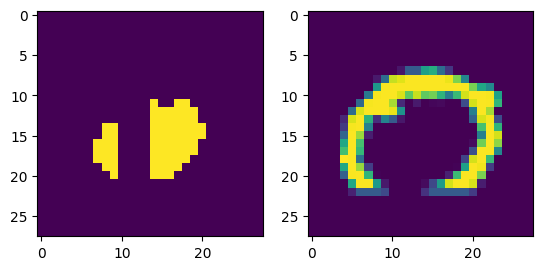

In [30]:
imgs = [no1[456,:,:],no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(holePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hole pixels

(array([6.647e+03, 5.100e+01, 2.500e+01, 9.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

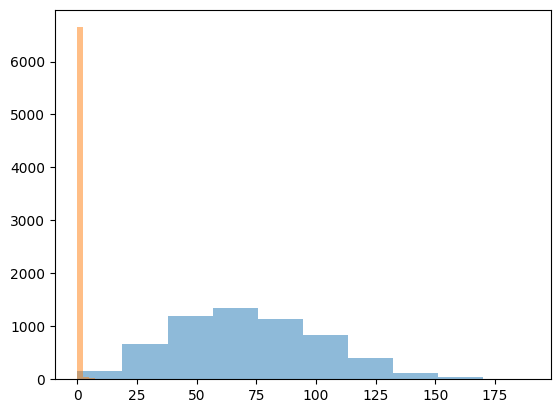

In [51]:
hole1 = np.array([holePixels(i).sum() for i in no1])
hole0 = np.array([holePixels(i).sum() for i in no0])
plt.hist(hole0,alpha = 0.5 )
plt.hist(hole1, alpha = 0.5)

Trying the number of pixels in the 'hull' or the number with the holes filled in

In [32]:
def hullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  return hull

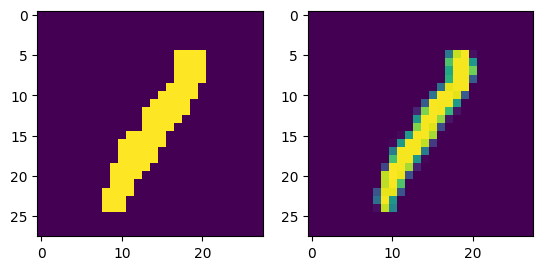

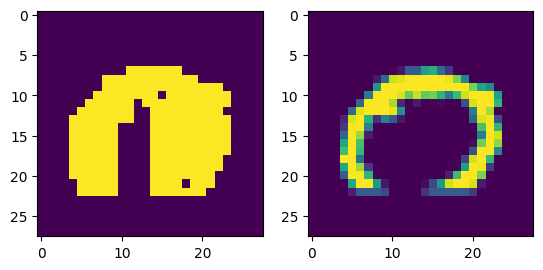

In [34]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(hullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

(array([9.500e+01, 1.477e+03, 2.592e+03, 1.719e+03, 6.190e+02, 1.830e+02,
        4.500e+01, 6.000e+00, 5.000e+00, 1.000e+00]),
 array([ 32.,  51.,  70.,  89., 108., 127., 146., 165., 184., 203., 222.]),
 <BarContainer object of 10 artists>)

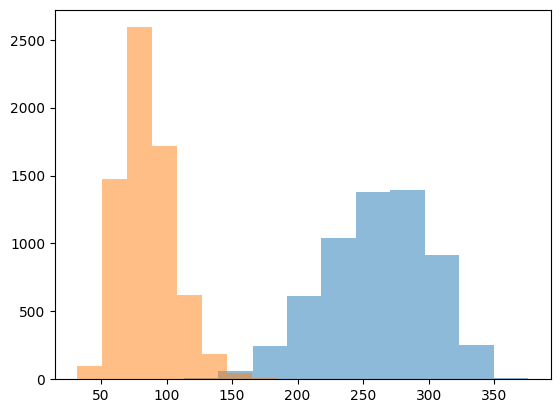

In [52]:
hull1 = np.array([hullPixels(i).sum() for i in no1])
hull0 = np.array([hullPixels(i).sum() for i in no0])
plt.hist(hull0,alpha = 0.5)
plt.hist(hull1,alpha = 0.5)

Boundary pixels in each image

In [40]:
def minus(a, b):
  return a & ~ b

def boundaryPixels(img):
  img = img.copy()>0
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

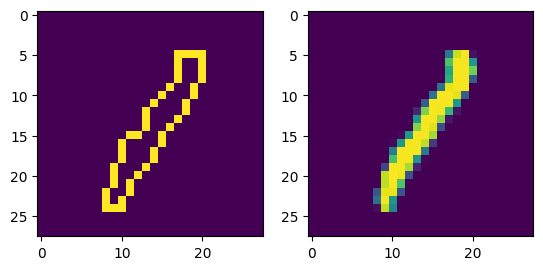

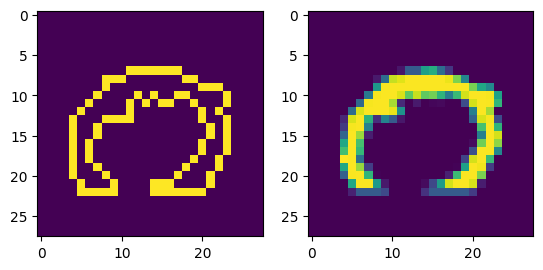

In [41]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(boundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

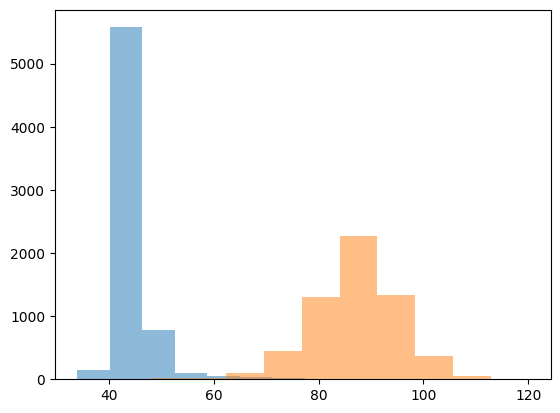

In [42]:
bound1 = np.array([boundaryPixels(i).sum() for i in no1])
bound0= np.array([boundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.5);
plt.hist(bound0, alpha=0.5);

Plotting two features together

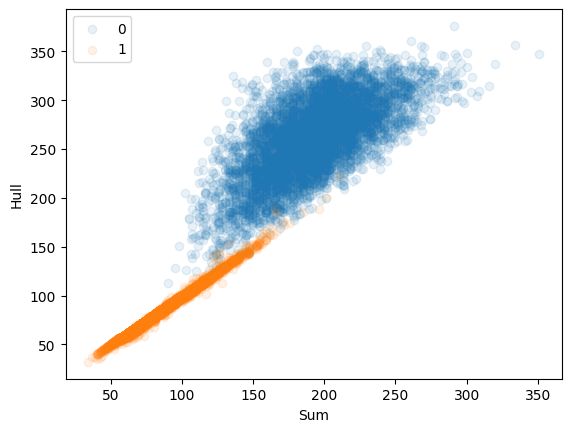

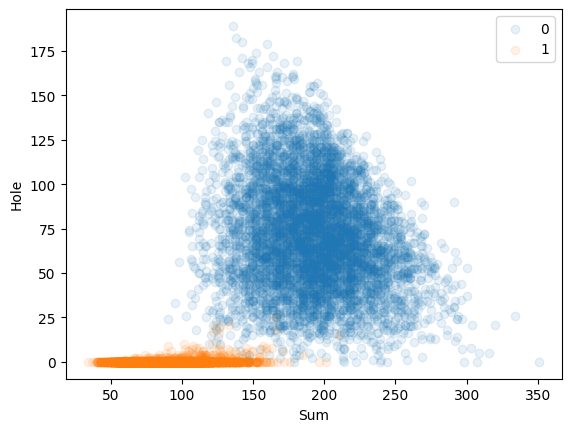

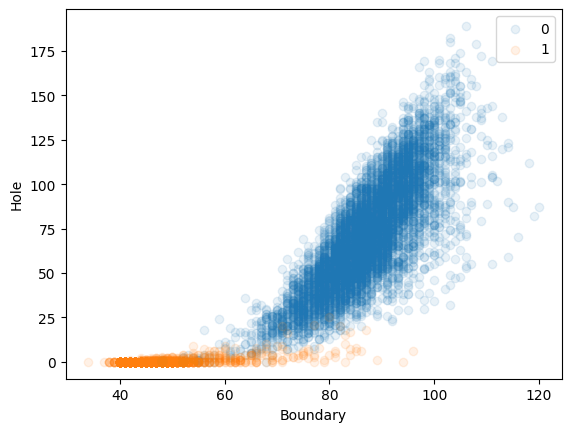

In [53]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Plotting 3 features together

In [54]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()